In [1]:
# Put these at the top of every notebook to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
get_ipython().config.get('IPKernelApp', {})['parent_appname'] = ""

In [2]:
from fastai.basics import *

### Create a 100x2 tensor of ones

In [3]:
rows=100
cols=2

In [4]:
x = torch.ones(rows,cols)
x.shape

torch.Size([100, 2])

In [5]:
# show first 10 rows
x[:10]

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [6]:
# verify data type
type(x)

torch.Tensor

### Fill col 0 with random floats from -1 to 1

In [7]:
x[:, 0].uniform_(-1, 1)

tensor([-0.3470, -0.4984, -0.2610,  0.0457, -0.4530, -0.6995, -0.5176,  0.3752,
        -0.8945,  0.8510,  0.3800,  0.5276,  0.6721, -0.0665, -0.8713, -0.9137,
         0.2260, -0.1121, -0.6962,  0.0490, -0.6456, -0.1452, -0.7030, -0.8940,
         0.6306,  0.0555,  0.6990, -0.2617,  0.9888, -0.5963, -0.8592, -0.4016,
         0.2098, -0.6823, -0.0768, -0.8978, -0.4818,  0.0815, -0.0547, -0.3553,
        -0.3023,  0.5039, -0.0934,  0.1976, -0.0084,  0.0463,  0.6476,  0.8540,
         0.5465, -0.0377,  0.5562,  0.7444, -0.6691, -0.2296,  0.9395,  0.4723,
         0.9330,  0.8869, -0.1515,  0.0865,  0.1915,  0.6438,  0.5334, -0.6454,
         0.0240, -0.8316, -0.3838, -0.8462,  0.0413,  0.6232, -0.2358, -0.1438,
        -0.1238, -0.8502,  0.7830, -0.7192,  0.8319,  0.2327,  0.4968,  0.3584,
         0.7552,  0.9541, -0.2936, -0.0981,  0.1641, -0.2170, -0.4699,  0.3097,
        -0.0465,  0.7001, -0.6287, -0.4475,  0.2946, -0.4490,  0.7090, -0.8949,
         0.7748, -0.3527, -0.6809, -0.18

In [8]:
# show first 10 rows
x[:10]

tensor([[-0.3470,  1.0000],
        [-0.4984,  1.0000],
        [-0.2610,  1.0000],
        [ 0.0457,  1.0000],
        [-0.4530,  1.0000],
        [-0.6995,  1.0000],
        [-0.5176,  1.0000],
        [ 0.3752,  1.0000],
        [-0.8945,  1.0000],
        [ 0.8510,  1.0000]])

### Create a simple linear function using matrix multiplication

Given a vector of weights: `(3, 2)`

In [9]:
# remember to use floats!
a = tensor(3, 2.)
print(a.shape)
print(a)

torch.Size([2])
tensor([3., 2.])


In [10]:
# define function y with added randomness: torch.rand(rows)
y = x@a + torch.rand(rows)

In [11]:
# show first 10 rows
y[:10]

tensor([ 1.8603,  0.8364,  1.6918,  2.1863,  0.7509,  0.2981,  1.3576,  3.6767,
        -0.6214,  4.8208])

In [12]:
y.shape

torch.Size([100])

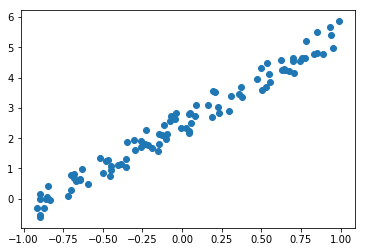

In [13]:
# scatter plot y
plt.scatter(x[:,0], y)

### Define a mean squared error loss function

In [14]:
def mse(y_hat, y):
    """Returns the mean squared error."""
    return ((y_hat - y)**2).mean()

In [15]:
# Take a random guess of the weights/parameters: a_hat
a_hat = nn.Parameter(tensor(-1, 2.))

In [16]:
# make predictions: y_hat
y_hat = x@a_hat

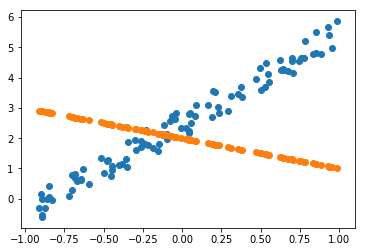

In [17]:
# plot both y and y_hat
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_hat)

### Gradient descent

In [18]:
# convert `a_hat` into a parameter object
a_hat = nn.Parameter(a_hat)
a_hat

Parameter containing:
tensor([-1.,  2.], requires_grad=True)

In [19]:
def update():
    y_hat = x@a_hat # make predictions
    loss = mse(y, y_hat) # measure loss
    if t % 10 == 0: print(loss) # print loss every 10 loops
    loss.backward() # calculate loss function derivative
    with torch.no_grad(): # ??
        a_hat.sub_(lr * a_hat.grad) # a.grad gives you the gradient
        a_hat.grad.zero_() # ??

In [20]:
# set a learning rate
lr = 1e-1

# run update() 100 times
for t in range(100): update()

tensor(5.0000, grad_fn=<MeanBackward1>)
tensor(1.4217, grad_fn=<MeanBackward1>)
tensor(0.4550, grad_fn=<MeanBackward1>)
tensor(0.1832, grad_fn=<MeanBackward1>)
tensor(0.1066, grad_fn=<MeanBackward1>)
tensor(0.0850, grad_fn=<MeanBackward1>)
tensor(0.0790, grad_fn=<MeanBackward1>)
tensor(0.0773, grad_fn=<MeanBackward1>)
tensor(0.0768, grad_fn=<MeanBackward1>)
tensor(0.0766, grad_fn=<MeanBackward1>)


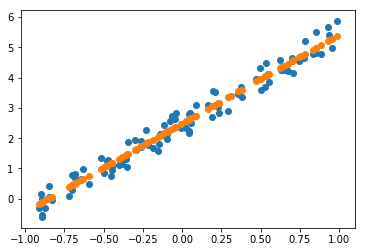

In [21]:
# plot the data & our new predictions
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@a_hat)

### Compare our gradient descent parameters with the answer

In [22]:
# ground truth
a

tensor([3., 2.])

In [23]:
# our guess
a_hat

Parameter containing:
tensor([2.9233, 2.4950], requires_grad=True)

### Animate SGD

Instead of running loops, use `animation.FuncAnimation()` from `matplotlib`.

In [25]:
from matplotlib import animation, rc 
rc('animation', html='html5')

a_hat = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a_hat)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a_hat)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)


---

#### If you get a `KeyError` like this

![Imgur](https://i.imgur.com/drMN2nv.png)

Fix: install `ffmpeg`

```bash
!sudo apt-get install -y ffmpeg
```